# Performance analysis

## Stock list

In [1]:
# All changable variables
stock_list_df_path = "data/stock_list.xlsx"
rf = 0.04 / 252  # For sharp ratio calculation
beta = 1  # For Treynor ratio calculation

# yfinance download date
start_date = "2025-01-31"
end_date = "2025-04-16"

In [2]:
import pandas as pd

stock_list = pd.read_excel("data/stock_list.xlsx", index_col=0)
stock_list

,Exchange,Symbol,Industry,permno,Weight
Company,,,,,
Apple,NASDAQ,AAPL,Information technology,14593,0.0409
Amgen,NASDAQ,AMGN,Biopharmaceutical,14008,0.0000
Amazon,NASDAQ,AMZN,Retailing,84788,0.0000
American Express,NYSE,AXP,Financial services,59176,0.0418
Boeing,NYSE,BA,Aerospace and defense,19561,0.0223
Caterpillar,NYSE,CAT,Construction and mining,18542,0.0902
Salesforce,NYSE,CRM,Information technology,90215,0.0000
Cisco,NASDAQ,CSCO,Information technology,76076,0.0000
Chevron,NYSE,CVX,Petroleum industry,14541,0.1000


### Stock allocations

- No short selling allowed
- Maximum 10% of portfolio in a single stock

<Axes: ylabel='Weight'>

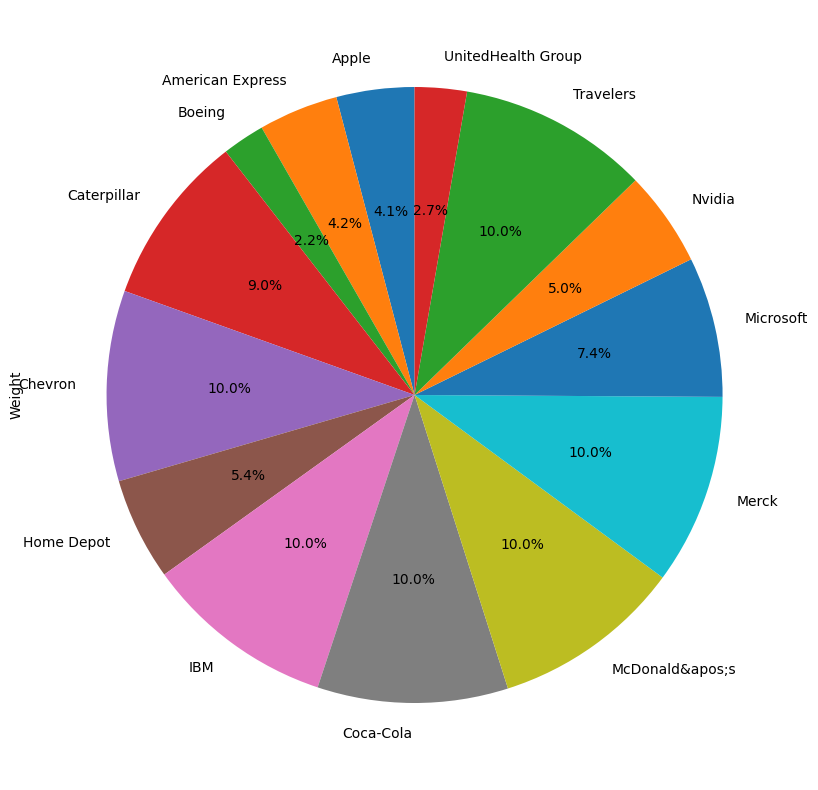

In [3]:
# weights of the portfolio - pie chart
weights = stock_list[stock_list['Weight'] > 0]["Weight"]
weights.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=90, legend=False)

### Industry allocations

<Axes: ylabel='Weight'>

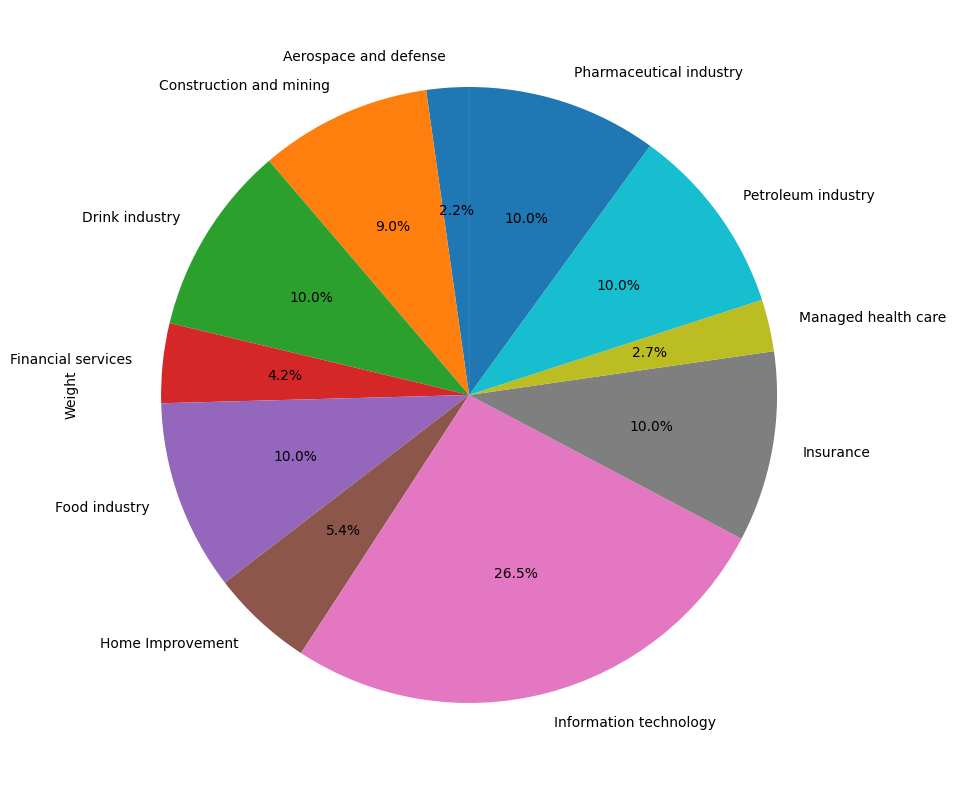

In [4]:
# weights on industry level - bar chart
industry_weights = stock_list.groupby('Industry')['Weight'].sum()
zero_weights = industry_weights[industry_weights == 0]
industry_weights = industry_weights[industry_weights > 0]
industry_weights.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=90, legend=False)

Zero allocation to the following industries:

In [5]:
zero_weights

Industry
Biopharmaceutical                 0.0
Broadcasting and entertainment    0.0
Clothing industry                 0.0
Conglomerate                      0.0
Fast-moving consumer goods        0.0
Retailing                         0.0
Speciality chemicals              0.0
Telecommunications industry       0.0
Name: Weight, dtype: float64

## Performance metrics

### Download daily price data (Close)

- stock price
- DJIA index

In [6]:
import yfinance as yf


# download stock data
stock_data = yf.download(tickers=stock_list["Symbol"].tolist(), start=start_date, end=end_date)  # type: ignore
# print out level 1 column names
stock_data: pd.DataFrame = stock_data["Close"]  # type: ignore
stock_data.iloc[[0, -1], :].T.head(3)  # type: ignore

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed


Date,2025-01-31,2025-04-15
Ticker,,
AAPL,235.740814,202.139999
AMGN,283.132568,295.299988
AMZN,237.679993,179.589996


In [7]:
# DJIA index
djia = yf.download('^DJI', start=start_date, end=end_date)  # type: ignore
djia: pd.DataFrame = djia['Close']  # type: ignore
djia.iloc[[0, -1], :].T  # type: ignore


[*********************100%***********************]  1 of 1 completed


Date,2025-01-31,2025-04-15
Ticker,,
^DJI,44544.660156,40368.960938


### Accumulated returns

Text(1, -8.874185826320902, '-9.37%')

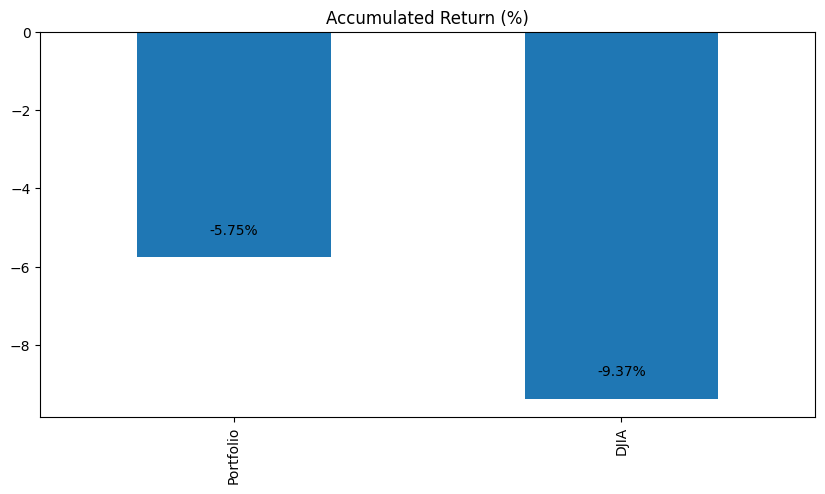

In [8]:
stock_returns = (stock_data.iloc[-1] / stock_data.iloc[0] - 1)
djia_return = (djia.iloc[-1] / djia.iloc[0] - 1)
portfolio_return = (stock_returns * stock_list["Weight"].values).sum()

# show percentage on the plot

accumulated_return = pd.Series({
    "Portfolio": portfolio_return * 100,
    "DJIA": djia_return.values[0] * 100,
}, name="Accumulated Return (%)")

accumulated_return.plot(kind='bar', figsize=(10, 5), title="Accumulated Return (%)")
# show percentage on the plot
import matplotlib.pyplot as plt
plt.text(0, portfolio_return * 100 + 0.5, f"{portfolio_return * 100:.2f}%", ha='center', va='bottom')
plt.text(1, djia_return.values[0] * 100 + 0.5, f"{djia_return.values[0] * 100:.2f}%", ha='center', va='bottom')

Time series plot of accumulated returns

<Axes: title={'center': 'Accumulated Return (%)'}, xlabel='Date'>

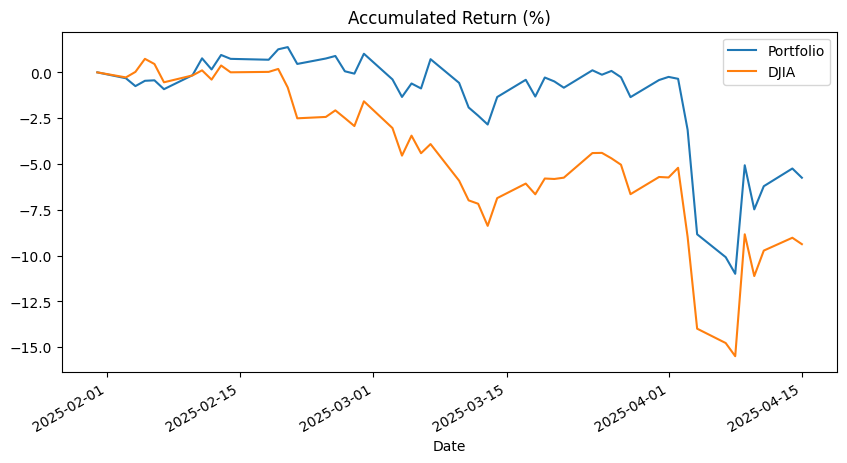

In [9]:
djia_accumulated = djia / djia.iloc[0] - 1
portfolio_accumulated = (stock_data / stock_data.iloc[0] - 1).dot(stock_list["Weight"].values)

# plot accumulated returns
accumulated = pd.concat([portfolio_accumulated * 100, djia_accumulated * 100], axis=1)
accumulated.columns = ["Portfolio", "DJIA"]
accumulated.plot(figsize=(10, 5), title="Accumulated Return (%)", legend=True)

### T test for excess returns

Excess returns (log daily returns) = portfolio returns - DJIA index returns 

In [10]:
import numpy as np
djia_log_returns: pd.DataFrame = np.log(djia / djia.shift(1)).dropna()  # type: ignore
portfolio_log_returns: pd.Series = np.log((portfolio_accumulated + 1) / (portfolio_accumulated + 1).shift(1)).dropna()  # type: ignore

log_returns = pd.concat([portfolio_log_returns, djia_log_returns], axis=1)
log_returns.columns = ["Portfolio", "DJIA"]
log_returns["Excess"] = log_returns["Portfolio"] - log_returns["DJIA"]
log_returns.describe()

,Portfolio,DJIA,Excess
count,51.000000,51.000000,51.000000
mean,-0.001161,-0.001930,0.000769
std,0.015695,0.017338,0.005021
min,-0.060651,-0.056598,-0.011349
25%,-0.007175,-0.009567,-0.002548
50%,-0.002097,-0.001994,-0.000372
75%,0.007548,0.005402,0.003977
max,0.064412,0.075760,0.012249


<Axes: title={'center': 'Excess Log Returns'}, ylabel='Frequency'>

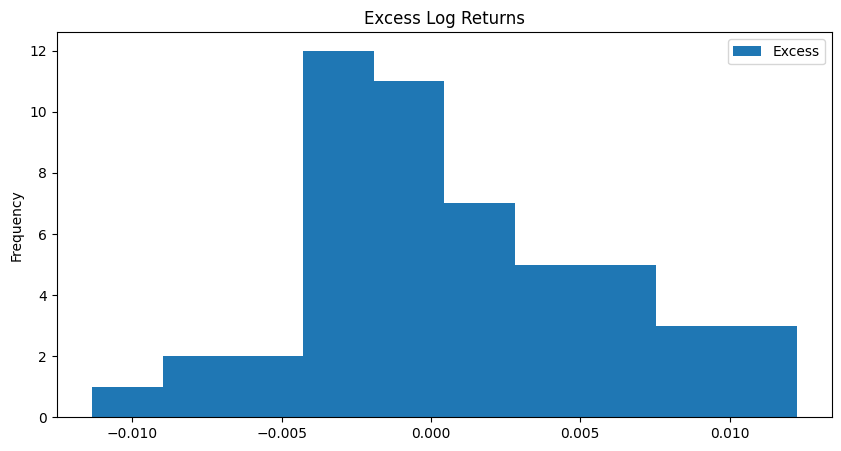

In [11]:
log_returns["Excess"].plot(kind='hist', figsize=(10, 5), title="Excess Log Returns", legend=True)

 t test for excess returns
- Null hypothesis: excess returns = 0
- Alternative hypothesis: excess returns > 0

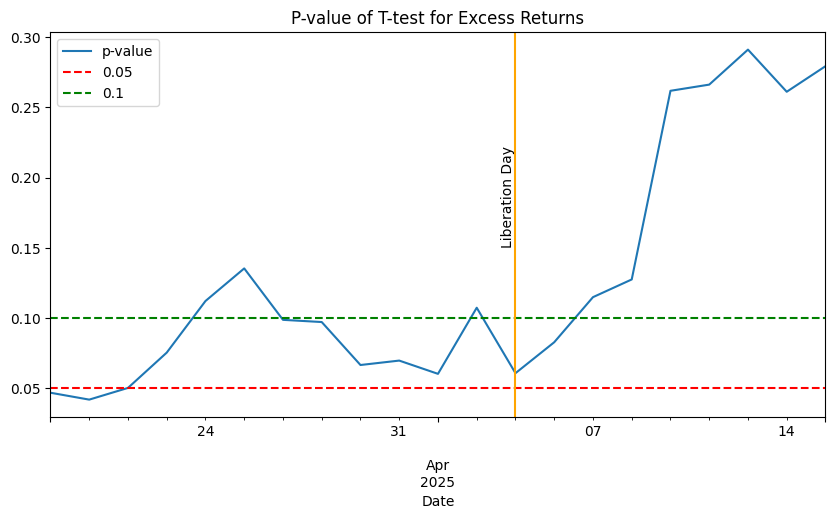

In [12]:
# t test for excess returns
from scipy import stats

t_test_results = pd.DataFrame(columns=["T-statistic", "P-value"], index=log_returns.index[30:])

for end_date in log_returns.index[30:]:
    t_stat, p_value = stats.ttest_1samp(log_returns["Excess"][:end_date], 0)
    t_test_results.loc[end_date] = [t_stat, p_value]
    
t_test_results = t_test_results.astype(float)
t_test_results["P-value"].plot(kind='line', figsize=(10, 5), title="P-value of T-test for Excess Returns")
plt.axhline(y=0.05, color='r', linestyle='--')
plt.axhline(y=0.1, color='g', linestyle='--')
# add tariffs day 2025-04-03 vertical line
plt.axvline(x=pd.to_datetime("2025-04-03"), color='orange', linestyle='-')  # type: ignore
plt.text(pd.to_datetime("2025-04-03"), 0.15, "Liberation Day", rotation=90, verticalalignment='bottom', horizontalalignment='right')  # type: ignore
plt.legend(["p-value", "0.05", "0.1"])

In [13]:
# Tariffs period t test
t_stat, p_value = stats.ttest_1samp(log_returns["Excess"]["2025-04-03":], 0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.5663692554815899, P-value: 0.586675612989917


In [14]:
# Excess returns pre and post tariffs and total
mean_excess_returns = pd.DataFrame(columns=["Pre-Tariffs", "Post-Tariffs", "Total"], index=["Mean", "Std", "T-statistic", "P-value"])
mean_excess_returns.loc["Mean"] = [
    log_returns["Excess"][:"2025-04-03"].mean(),
    log_returns["Excess"]["2025-04-03":].mean(),
    log_returns["Excess"].mean()
]
mean_excess_returns.loc["Std"] = [
    log_returns["Excess"][:"2025-04-03"].std(),
    log_returns["Excess"]["2025-04-03":].std(),
    log_returns["Excess"].std()
]
mean_excess_returns.loc["T-statistic"] = [
    stats.ttest_1samp(log_returns["Excess"][:"2025-04-03"], 0)[0],
    stats.ttest_1samp(log_returns["Excess"]["2025-04-03":], 0)[0],
    stats.ttest_1samp(log_returns["Excess"], 0)[0]
]
mean_excess_returns.loc["P-value"] = [
    stats.ttest_1samp(log_returns["Excess"][:"2025-04-03"], 0)[1],
    stats.ttest_1samp(log_returns["Excess"]["2025-04-03":], 0)[1],
    stats.ttest_1samp(log_returns["Excess"], 0)[1]
]
mean_excess_returns = mean_excess_returns.astype(float)
mean_excess_returns


,Pre-Tariffs,Post-Tariffs,Total
Mean,0.001447,-0.001192,0.000769
Std,0.004925,0.006316,0.005021
T-statistic,1.926023,-0.566369,1.093810
P-value,0.060888,0.586676,0.279280


## Ratios

- Sharpe ratio
- Sortino ratio
- Calmar ratio
- Treynor ratio
- Max drawdown

In [15]:
def sharpe(returns: pd.Series, risk_free_rate: float = 0.0) -> float:
    """
    Calculate the Sharpe ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param risk_free_rate: The risk-free rate (default is 0.0).
    :return: The Sharpe ratio.
    """
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def sortino(returns: pd.Series, target: float = 0.0) -> float:
    """
    Calculate the Sortino ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param target: The target return (default is 0.0).
    :return: The Sortino ratio.
    """
    downside_returns = returns[returns < target]
    return (returns.mean() - target) / downside_returns.std() if not downside_returns.empty else np.nan

def max_drawdown(returns: pd.Series) -> float:
    """
    Calculate the maximum drawdown of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :return: The maximum drawdown.
    """
    # log returns
    cumulative_returns = returns.cumsum().apply(np.exp)
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calmar(returns: pd.Series) -> float:
    """
    Calculate the Calmar ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :return: The Calmar ratio.
    """
    return returns.mean() / abs(max_drawdown(returns)) if max_drawdown(returns) != 0 else np.nan

def omega(returns: pd.Series, target: float = 0.0) -> float:
    """
    Calculate the Omega ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param target: The target return (default is 0.0).
    :return: The Omega ratio.
    """
    gain = returns[returns > target].sum()
    loss = abs(returns[returns < target].sum())
    return gain / loss if loss != 0 else np.nan

def treynor(returns: pd.Series, beta: float) -> float:
    """
    Calculate the Treynor ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param beta: The beta of the portfolio.
    :return: The Treynor ratio.
    """
    return (returns.mean() - 0.0) / beta if beta != 0 else np.nan

def information(returns: pd.Series, benchmark: pd.Series) -> float:
    """
    Calculate the Information ratio of a portfolio.
    
    :param returns: A pandas Series of portfolio returns.
    :param benchmark: A pandas Series of benchmark returns.
    :return: The Information ratio.
    """
    active_return = returns - benchmark
    return active_return.mean() / active_return.std() if active_return.std() != 0 else np.nan


In [16]:
# Calculate the performance metrics for pre-tariffs post-tariffs and total
performance_matrics = pd.DataFrame(columns=["pre-tariffs", 
                                         "post-tariffs", 
                                         "total", 
                                         "DJIA-pre-tariffs",
                                         "DJIA-post-tariffs",
                                         "DJIA-total"
                                         ], 
                                         index=["Mean", "std", "Sharpe", "Sortino", "Max Drawdown", "Calmar", "Omega", "Treynor", "Information"])
performance_matrics.loc["Mean"] = [
    log_returns["Portfolio"][:"2025-04-03"].mean(),
    log_returns["Portfolio"]["2025-04-03":].mean(),
    log_returns["Portfolio"].mean(),
    log_returns["DJIA"][:"2025-04-03"].mean(),
    log_returns["DJIA"]["2025-04-03":].mean(),
    log_returns["DJIA"].mean()
]

performance_matrics.loc["std"] = [
    log_returns["Portfolio"][:"2025-04-03"].std(),
    log_returns["Portfolio"]["2025-04-03":].std(),
    log_returns["Portfolio"].std(),
    log_returns["DJIA"][:"2025-04-03"].std(),
    log_returns["DJIA"]["2025-04-03":].std(),
    log_returns["DJIA"].std()
]

performance_matrics.loc["Sharpe"] = [
    sharpe(log_returns["Portfolio"][:"2025-04-03"], rf),
    sharpe(log_returns["Portfolio"]["2025-04-03":], rf),
    sharpe(log_returns["Portfolio"], rf),
    sharpe(log_returns["DJIA"][:"2025-04-03"], rf),
    sharpe(log_returns["DJIA"]["2025-04-03":], rf),
    sharpe(log_returns["DJIA"], rf)

]
performance_matrics.loc["Sortino"] = [
    sortino(log_returns["Portfolio"][:"2025-04-03"]),
    sortino(log_returns["Portfolio"]["2025-04-03":]),
    sortino(log_returns["Portfolio"]),
    sortino(log_returns["DJIA"][:"2025-04-03"]),
    sortino(log_returns["DJIA"]["2025-04-03":]),
    sortino(log_returns["DJIA"])
]
performance_matrics.loc["Max Drawdown"] = [
    max_drawdown(log_returns["Portfolio"][:"2025-04-03"]),
    max_drawdown(log_returns["Portfolio"]["2025-04-03":]),
    max_drawdown(log_returns["Portfolio"]),
    max_drawdown(log_returns["DJIA"][:"2025-04-03"]),
    max_drawdown(log_returns["DJIA"]["2025-04-03":]),
    max_drawdown(log_returns["DJIA"])
]
performance_matrics.loc["Calmar"] = [
    calmar(log_returns["Portfolio"][:"2025-04-03"]),
    calmar(log_returns["Portfolio"]["2025-04-03":]),
    calmar(log_returns["Portfolio"]),
    calmar(log_returns["DJIA"][:"2025-04-03"]),
    calmar(log_returns["DJIA"]["2025-04-03":]),
    calmar(log_returns["DJIA"])
]
performance_matrics.loc["Omega"] = [
    omega(log_returns["Portfolio"][:"2025-04-03"]),
    omega(log_returns["Portfolio"]["2025-04-03":]),
    omega(log_returns["Portfolio"]),
    omega(log_returns["DJIA"][:"2025-04-03"]),
    omega(log_returns["DJIA"]["2025-04-03":]),
    omega(log_returns["DJIA"])
]
performance_matrics.loc["Treynor"] = [
    treynor(log_returns["Portfolio"][:"2025-04-03"], beta),
    treynor(log_returns["Portfolio"]["2025-04-03":], beta),
    treynor(log_returns["Portfolio"], beta),
    treynor(log_returns["DJIA"][:"2025-04-03"], beta),
    treynor(log_returns["DJIA"]["2025-04-03":], beta),
    treynor(log_returns["DJIA"], beta)
]
performance_matrics.loc["Information"] = [
    information(log_returns["Portfolio"][:"2025-04-03"], log_returns["DJIA"][:"2025-04-03"]),
    information(log_returns["Portfolio"]["2025-04-03":], log_returns["DJIA"]["2025-04-03":]),
    information(log_returns["Portfolio"], log_returns["DJIA"]),
    information(log_returns["DJIA"][:"2025-04-03"], log_returns["DJIA"][:"2025-04-03"]),
    information(log_returns["DJIA"]["2025-04-03":], log_returns["DJIA"]["2025-04-03":]),
    information(log_returns["DJIA"], log_returns["DJIA"])
]
performance_matrics = performance_matrics.astype(float)
performance_matrics = performance_matrics[["pre-tariffs", "DJIA-pre-tariffs", "post-tariffs", "DJIA-post-tariffs", "total", "DJIA-total"]]
performance_matrics


,pre-tariffs,DJIA-pre-tariffs,post-tariffs,DJIA-post-tariffs,total,DJIA-total
Mean,-0.000741,-0.002187,-0.006188,-0.004995,-0.001161,-0.001930
std,0.008816,0.010867,0.034560,0.037876,0.015695,0.017338
Sharpe,-0.102035,-0.215897,-0.183639,-0.136080,-0.084087,-0.120475
Sortino,-0.120138,-0.241414,-0.308620,-0.237774,-0.097574,-0.154912
Max Drawdown,-0.044519,-0.096435,-0.081100,-0.071532,-0.122009,-0.161069
Calmar,-0.016641,-0.022682,-0.076299,-0.069835,-0.009516,-0.011983
Omega,0.804672,0.571863,0.613034,0.687708,0.787523,0.695324
Treynor,-0.000741,-0.002187,-0.006188,-0.004995,-0.001161,-0.001930
Information,0.293716,NaN,-0.188790,NaN,0.153164,NaN
